# ML Classification task

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [63]:
titanic_train = pd.read_csv('input-data/titanic_train.csv')
titanic_test = pd.read_csv('input-data/titanic_test.csv')
titanic_dev = pd.read_csv('input-data/titanic_dev.csv')

In [64]:
X_train = titanic_train.drop(columns=['Pass__Survived'])
Y_train = titanic_train['Pass__Survived']

X_test = titanic_test.drop(columns=['Pass__Survived'])
Y_test = titanic_test['Pass__Survived']

X_dev = titanic_dev.drop(columns=['Pass__Survived'])
Y_dev = titanic_dev['Pass__Survived']

### Defining functions

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import roc_curve, auc

import time

In [66]:
def train_timer(model, X, Y):
    start_time = time.time()
    model.fit(X, Y)
    end_time = time.time()
    train_time = (end_time - start_time) * 1000
    print(f'Model training time: {train_time:.2f} ms')

In [67]:
def fit_eval(model, X, Y):
    Yhat = model.predict(X)
    Yhat_prob = model.predict_proba(X)[:, 1]
    metrics = {
        'Accuracy': accuracy_score(Y, Yhat),
        'Precision': precision_score(Y, Yhat),
        'Recall': recall_score(Y, Yhat),
        'Specificity': recall_score(Y, Yhat, pos_label=0)
    }
    return Yhat, Yhat_prob, pd.Series(metrics)

In [68]:
def print_metrics(metrics_series):
    print('------------- MODEL METRICS --------------')
    for metric, value in metrics_series.items():
        print(f'{metric}: {value:.2f}')

In [69]:
def plot_evaluation_graphs(Y, Yhat, Yhat_probs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    # Confusion Matrix
    cmd.from_predictions(Y, Yhat, 
                         display_labels=['Perished', 'Survived'],
                         cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(Y, Yhat_probs)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, color='darkorange', lw=2, 
             label='ROC curve (area = %0.2f)' % roc_auc)
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.0])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')
    ax2.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

In [70]:
def train_set_evaluation(model, X_train, Y_train, X_test, Y_test):
    training_set = []
    train_acc = []
    test_acc = []
    for i in range(10, len(X_train) + 1, 10):
        model.fit(X_train.iloc[:i], Y_train.iloc[:i])
        Yhat_train = model.predict(X_train.iloc[:i])
        Yhat_test = model.predict(X_test)

        training_set.append(i)
        train_acc.append(accuracy_score(Y_train.iloc[:i], Yhat_train))
        test_acc.append(accuracy_score(Y_test, Yhat_test))

    return pd.DataFrame({'Training Set Size': training_set, 
                         'Train Accuracy': train_acc, 
                         'Test Accuracy': test_acc})

In [71]:
def plot_accuracy(results_df):
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=results_df['Training Set Size'], 
                 y=results_df['Train Accuracy'], 
                 label='Train Accuracy')
    sns.lineplot(x=results_df['Training Set Size'], 
                 y=results_df['Test Accuracy'], 
                 label='Test Accuracy')
    plt.title('Train and Test Accuracy vs Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Random Forest Classifier

Model training time: 69.00 ms
------------- MODEL METRICS --------------
Accuracy: 0.87
Precision: 0.85
Recall: 0.84
Specificity: 0.89


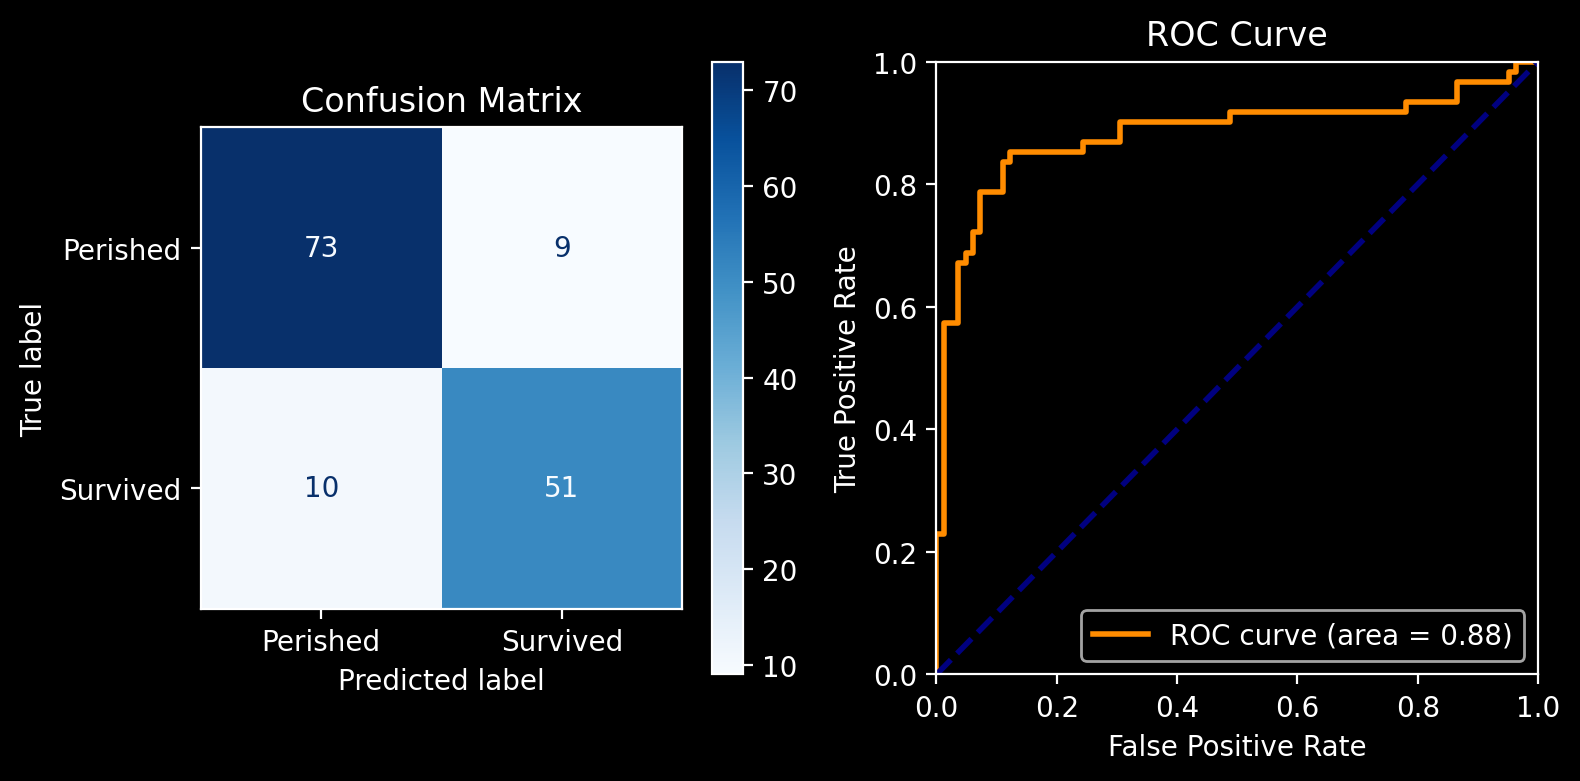

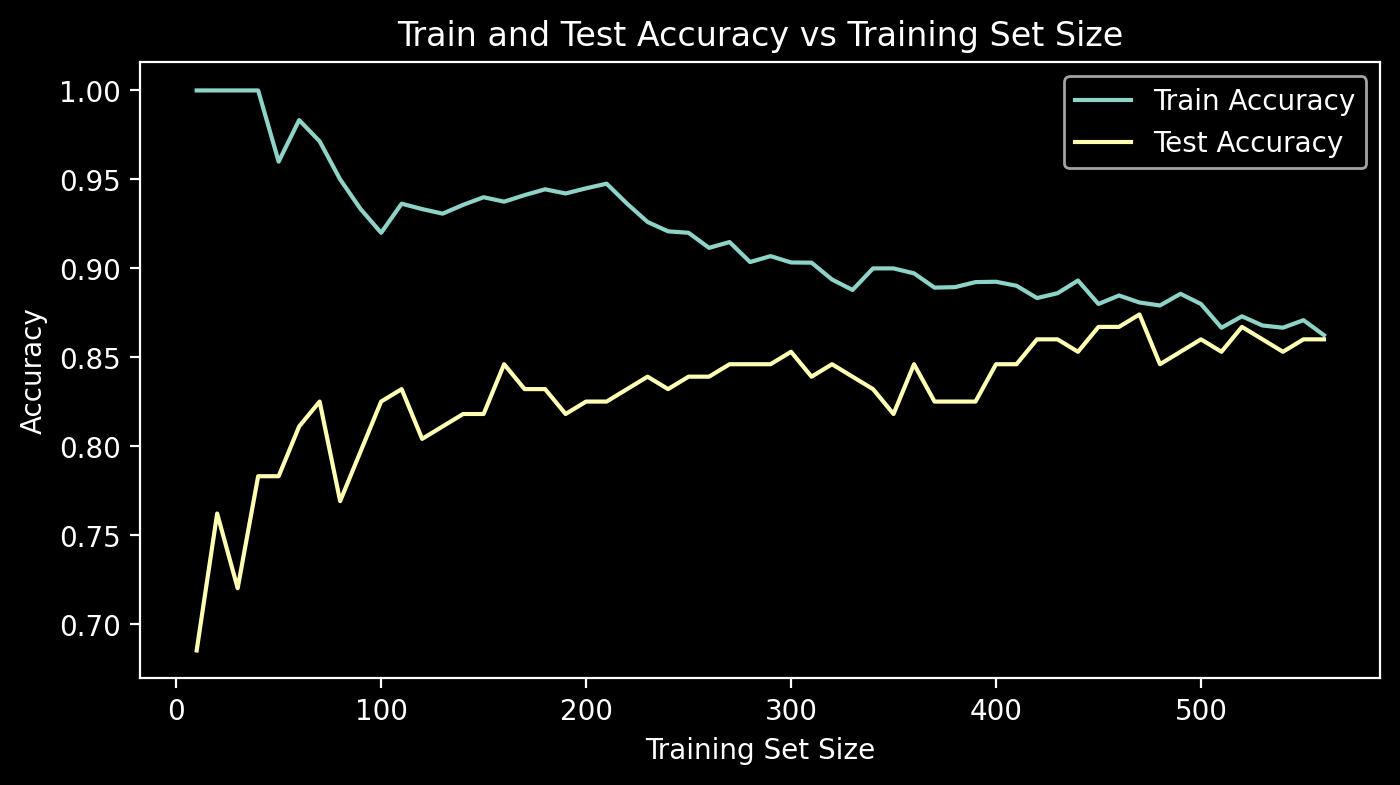

In [72]:
RandomForest = RandomForestClassifier(n_estimators=100, 
                                      max_depth=5,
                                      random_state=18)

train_timer(RandomForest, X_train, Y_train)
Yhat, Yhat_prob, metrics = fit_eval(RandomForest,
                                    X_dev,
                                    Y_dev)
print_metrics(metrics)
plot_evaluation_graphs(Y_dev, Yhat, Yhat_prob)
train_eval = train_set_evaluation(RandomForest, X_train, Y_train, X_dev, Y_dev)
plot_accuracy(train_eval)

## Logistic Regression

Model training time: 16.89 ms
------------- MODEL METRICS --------------
Accuracy: 0.80
Precision: 0.76
Recall: 0.77
Specificity: 0.82


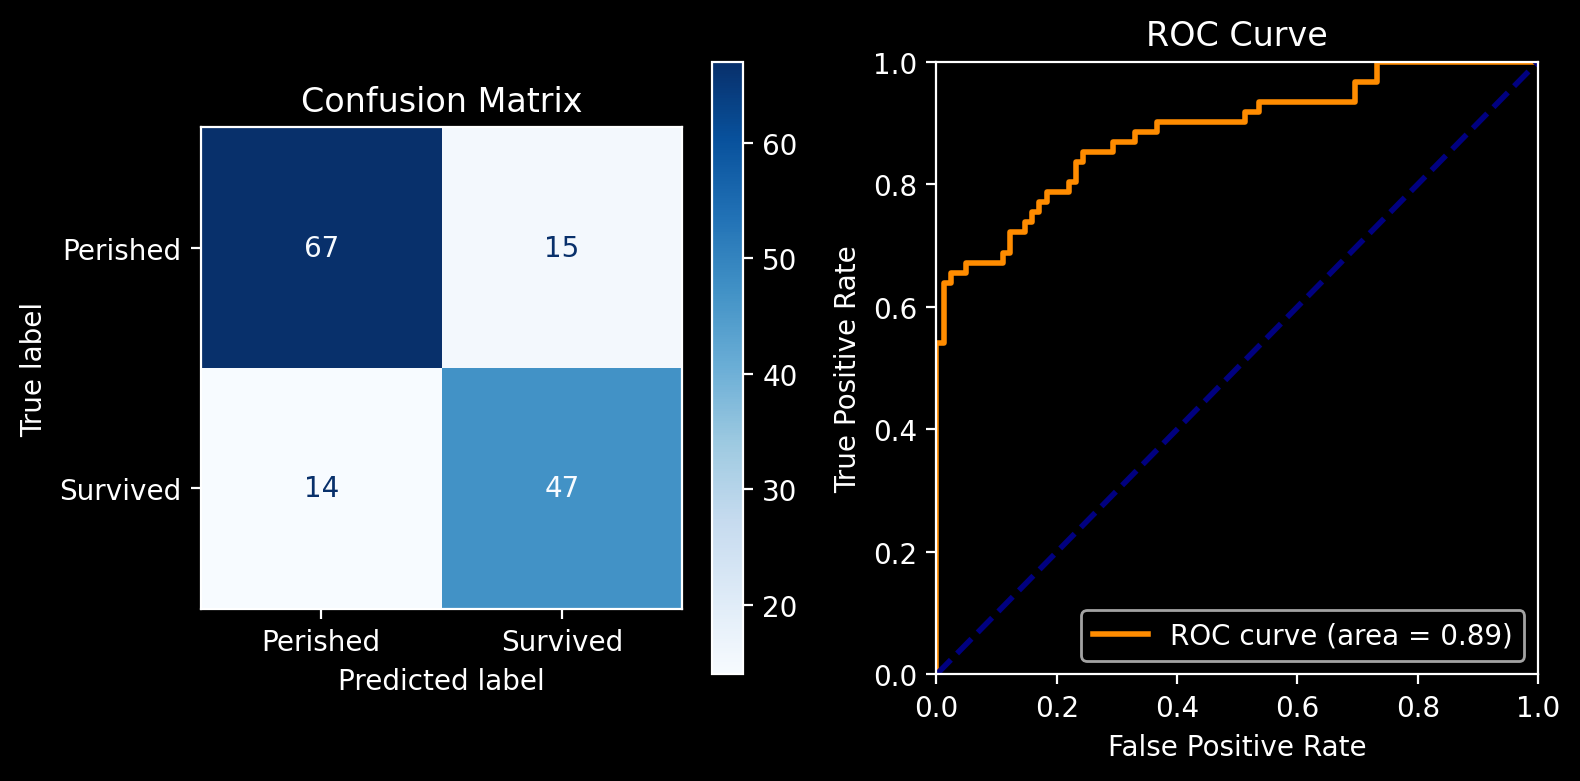

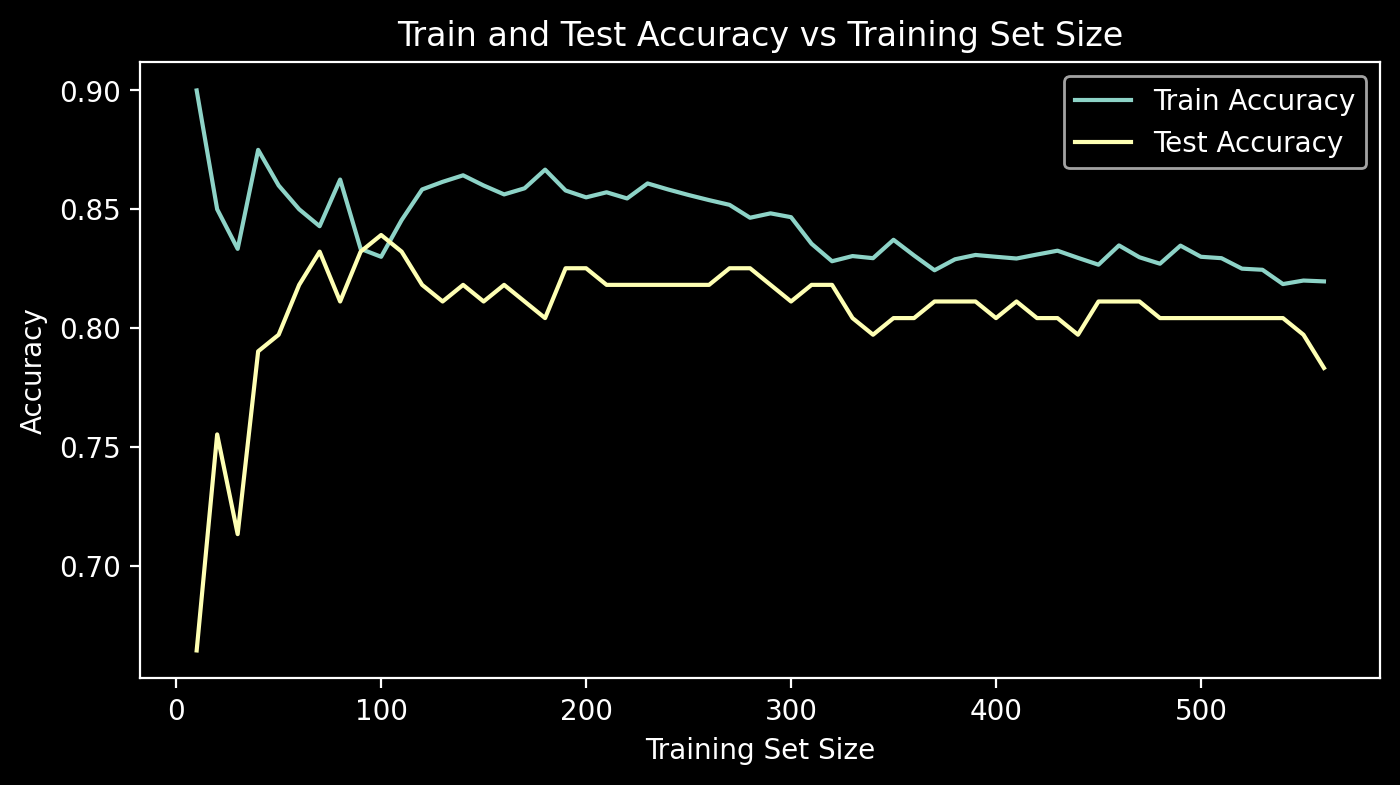

In [73]:
LogReg = LogisticRegression(max_iter=500)

train_timer(LogReg, X_train, Y_train)
Yhat, Yhat_prob, metrics = fit_eval(LogReg,
                                    X_dev,
                                    Y_dev)
print_metrics(metrics)
plot_evaluation_graphs(Y_dev, Yhat, Yhat_prob)
train_eval = train_set_evaluation(LogReg, X_train, Y_train, X_dev, Y_dev)
plot_accuracy(train_eval)

## Evaluate on the test set

------------- MODEL METRICS --------------
Accuracy: 0.78
Precision: 0.80
Recall: 0.58
Specificity: 0.91


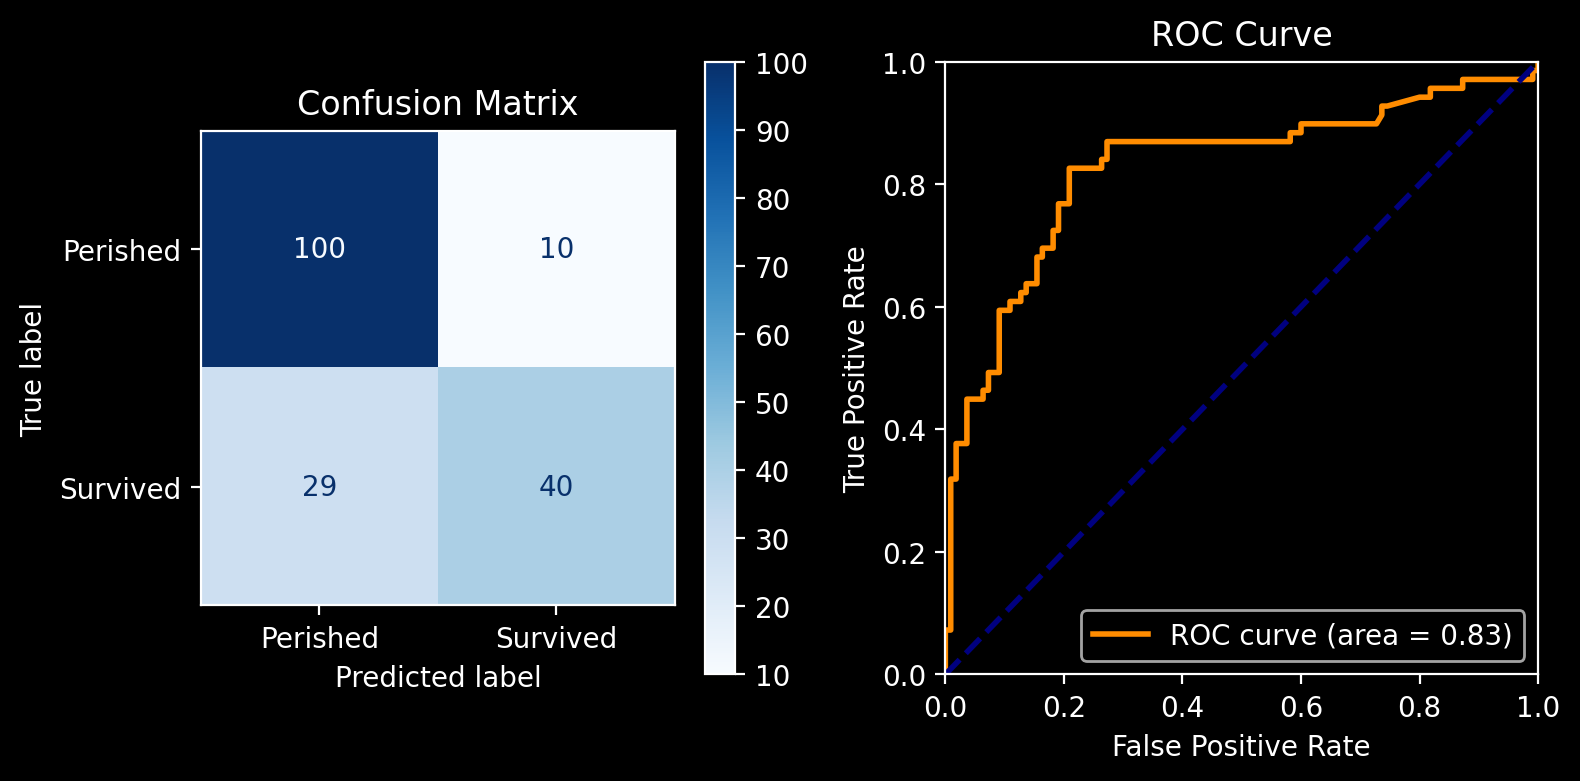

In [74]:
final_model = RandomForest

Yhat, Yhat_prob, metrics = fit_eval(final_model,
                                    X_test,
                                    Y_test)
print_metrics(metrics)
plot_evaluation_graphs(Y_test, Yhat, Yhat_prob)